# Student Id
_2003869_

# The SIR model with Birth and Death

A simple SIR model including birth and death is given by the following system of ODEs

$$
\dot S  = \mu N - \frac{\beta S I}{N} - \mu S, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I - \mu I, \quad 
\dot R  = \gamma I - \mu R,
$$

where:
> - $S$ is the number of susceptible individuals
> - $I$ is the number of infective individuals
> - $R$ is the number of recovered or removed individuals
> - $N$ is the total number of individuals, i.e. $N = S+I+R$ where $\dot N = 0$ 

$\beta$, $\gamma$ and $\mu$ are parameters such that: 
> - $\beta$ is the average number of contacts per person per time
> - $\gamma$ is the reciprocal of the time an individual remains infectious 
> - $\mu$ is both the birth rate and death rate

Note all newborns enter the susceptible category at rate $\mu N$, while deaths occur uniformly for each category.

The Python code cells below compute numerical solutions to this model by calling the SciPy ODE solver odeint. 

Results are shown for specific parameter values: 
> - $\beta = 5$ 
> - $\gamma = 0.1$
> - $\mu = 0.005$

Note I've taken $\gamma$ to be $0.1$ to reflect the 10 days that a person with covid is infectious. and where I've taken $\mu$ to be $5$% of $\gamma$.

The initial conditions are:
> - $S(0) = 1697150$
> - $I(0) = 1$
> - $R(0) = 0$

We start with only 1 infectious individual in a population of size $N=1697150$. This is proportional to the data to do with Covid-19 with $40$ infectious people out of a population of $67,886,011$

Two plots are shown below: the time series of the three variables $S, I$ and $R$ and a phase portrait in the $(S,I)$ plane. In the phase portrait, **_start_** with a **<font color='green'>green circle</font>** denotes the initial condition, **_end_** with a **<font color='red'>red circle</font>** denotes the final state and **_Max Point for I_** along side an **<font color='orange'>orange circle</font>** denotes the maximum point of I in its trajectrory. 


---

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

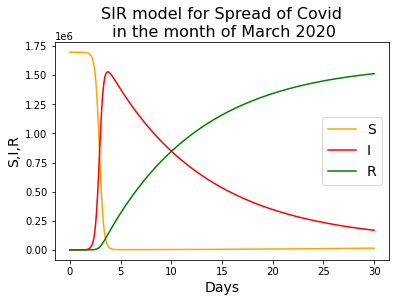

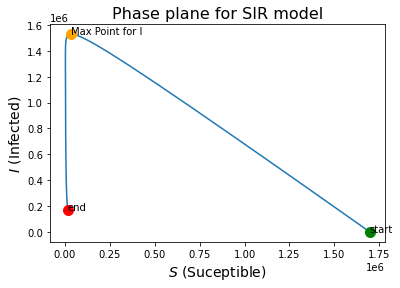

At the end of the simulation, the final value of S, I, and R are (as integer values):
S(t=tf) = 15172
I(t=tf) = 168638
R(t=tf) = 1513340 

Note the maximum number of infections reached a peak of:
1528974 people on day 3.0


In [2]:
# --- Required to define the RHS of ODE system --- #

# returns RHS of the SIR model
def SIR(y, t):
    
    S, I, R = y     #susceptible, infectious, and recovered/removed people respectively

    beta = 5       #contacts per person per time step 
    gamma = 0.1     #reciprocol of time that someone stays infective
    mu = 0.005     #birth rate / death rate
        
    N = S + I + R   # which is constant since it = 0
    Sdot = (mu * N) - (beta * S * I / N ) - (mu * S)
    Idot = (beta * S * I / N) - (gamma * I) - (mu * I)
    Rdot = (gamma * I) - (mu * R)
    
    return Sdot, Idot, Rdot

# --- Setup of the problem --- #

# Setting initial conditions and put into array y0
S0 = 1697149 #(UK population in March divided by 40)
I0 = 1
R0 = 0
y0 = np.array([S0, I0, R0])

# set up time grid for solution
tf = 30  #...to represent the number of days in a month
Nsteps = 600
t = np.linspace(0, tf, Nsteps+1)

# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

#Find time at which there was peak for num I
peakTime = 0
peakTimeIndex = 0
for i in range(Nsteps+1):
    if i==0:
        peakTime = I[0]
        peakTimeIndex = 0
    elif I[i] > peakTime:
        peakTime = I[i]
        peakTimeIndex = i
        
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S,color='orange', label="S")
plt.plot(t, I,'r', label="I")
plt.plot(t, R,'g', label="R")

# labels etc
plt.xlabel("Days", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title('SIR model for Spread of Covid''\n'' in the month of March 2020', fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# Phase plane for evolution of S against I
plt.plot(S, I)

# labels etc
plt.xlabel(r'$S$ (Suceptible)', fontsize=14)
plt.ylabel(r'$I$ (Infected)', fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# add text to show where initial and final states are located on graph
#As well as point of max infections
plt.text(S[0], I[0], "start")
plt.plot(S[0], I[0],'go', markersize = 10)
plt.text(S[-1], I[-1], "end")
plt.plot(S[-1], I[-1],'ro', markersize = 10)
plt.text(S[peakTimeIndex], peakTime, "Max Point for I")
plt.plot(S[peakTimeIndex], peakTime,color = "orange",marker = 'o', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print("At the end of the simulation, the final value of S, I, and R are (as integer values):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]),"\n")
print("Note the maximum number of infections reached a peak of:")
print(round(peakTime),"people on day",np.floor(t[peakTimeIndex]))

---

## Remarks

